Import

In [0]:
#import library
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import matplotlib.animation as animation

Inisiasi Variabel Scalar

In [0]:
#inisiasi
nIndividu = 200
ratioInfected = 0.05
movingProb = 0.8
recoveryTime = 10
FirstInfected = int(nIndividu * ratioInfected)

xmin = 1
xmax = 20
ymin = 1
ymax = 20
xLimit= xmax-xmin
yLimit = ymax-ymin

Inisiasi fungsi yang dibutuhkan

In [0]:
#mengecek apakah di tempat tersebut ada yang positif
def checkInfectedPlace(ListHealthy,Positions,pos):
    for i in range(nIndividu):
      if Positions[i][-1] == pos:
        
        if ListHealthy[i][len(Healthy[i])-1] == 0:
          return True
    
    return False

#fungsi untuk update posisi berdasarkan probabilitas
def updatePosition(pos):
    x,y = pos
    rand = np.random.rand()
    #berdasarkan moving Prob
    if rand <= movingProb:
      rand = np.random.rand()
      if rand <= 0.25:
          x+=1
      elif rand <= 0.5:
          y-=1
      elif rand <= 0.75:
          x-=1
      else:
          y+=1

    return x,y

#fungsi untuk Periodic Boundary Condition
def PBC(x,y):
    if x>xmax:
        x-=xLimit
    if x<xmin:
        x+=xLimit
    if y>ymax:
        y-=yLimit
    if y<ymin:
        y+=yLimit
    return x,y

#fungsi untuk menghitung jumlah orang yang terinfeksi
def countInfected(ListHealthy):
    count = 0
    for i in range(nIndividu):
      if ListHealthy[i][len(ListHealthy[i])-1] == 0:
        count += 1
    return count

def RePositions(Positions):
    newPositions = []
    for i in range(len(Positions[0])):
        temp = []
        for j in range(len(Positions)):
            temp.append(Positions[j][i])
        newPositions.append(temp)
    
    return newPositions

Inisiasi Variabel List

In [0]:
# List yang berisi posisi masing masing individu
Positions = []
for i in range(nIndividu):
    randx = random.randint(xmin, xmax)
    randy = random.randint(ymin, ymax)
    Positions.append([(randx,randy)])

#List yang berisi status kesehatan individu
Healthy = []
for i in range(FirstInfected):
    Healthy.append([0])
for i in range(nIndividu - FirstInfected):
    Healthy.append([1])

#List yang berisi status imun individu, awalnya gapunya imun semua
Immune = []
for i in range(nIndividu):
    Immune.append(0)

#List yang berisi waktu terinfeksi, awalnya waktu start dari 0 semua
InfectedTime = []
for i in range(nIndividu):
    InfectedTime.append(0)

In [0]:
#Jumlah yang terinfeksi
nInfected = countInfected(Healthy)

#waktu komunitas untuk sembuh
diseaseTime = 0

#riwayat jumlah ter-infeksi
InfectedHistory = []

#selama jumlah individu terinfeksi
while nInfected > 0:
  #untuk setiap individu
  InfectedHistory.append(nInfected)
  for i in range(nIndividu):
  #update posisi berdasarkan probabilitas individu bergerak
      new_x, new_y = updatePosition(Positions[i][-1])
      #koreksi posisi dengan PBC
      new_x, new_y = PBC(new_x, new_y)
      Positions[i].append((new_x,new_y))
      #update waktu terinfeksi untuk individu yang sudah terinfeksi
      if Healthy[i][len(Healthy[i])-1] == 0:
          if InfectedTime[i] < recoveryTime-1:
              InfectedTime[i] += 1
              Healthy[i].append(0)
          #update status kesehatan individu - recovery
          elif InfectedTime[i] == recoveryTime-1:
              Healthy[i].append(1)
              #update status imun individu
              Immune[i] = 1
      #update status kesehatan individu - infection
      #hitung jarak individu sehat dan terinfeksi
      #jika belum memiliki imun maka akan terinfeksi
      elif (Healthy[i][len(Healthy[i])-1] == 1) and (Immune[i] == 0) and (checkInfectedPlace(Healthy,Positions,Positions[i][-1])):
          Healthy[i].append(0)
      elif (Healthy[i][len(Healthy[i])-1] == 1):
          Healthy[i].append(1)

  #hitung dan simpan jumlah individu terinfeksi
  nInfected = countInfected(Healthy)
  diseaseTime += 1

InfectedHistory.append(0)

#waktu simulasi
SimTime = []
for i in range(len(InfectedHistory)):
  SimTime.append(i+1)


In [0]:
InfectedList = []
for i in range(len(Healthy)):
  temp = []
  for j in range(len(Healthy[0])):
    if Healthy[i][j] == 0:
      temp.append(Positions[i][j])
    elif Healthy[i][j] == 1:
      temp.append((-1,-1))
  
  InfectedList.append(temp)


Iterasi

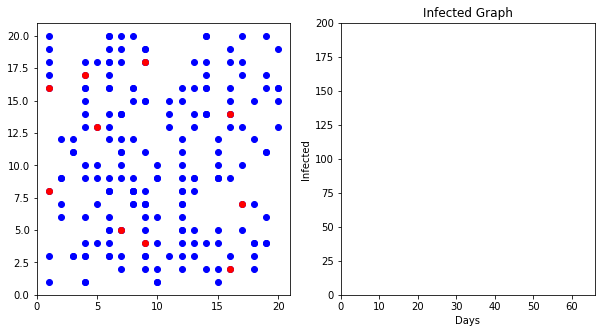

In [7]:
newpositions = RePositions(Positions)
newInfected = RePositions(InfectedList)

#define the figure that will contain the 2 plot
fig = plt.figure(figsize=(10,5))
leftplot = fig.add_subplot(1,2,1)
rightplot = fig.add_subplot(1,2,2)

#define list for line graph data
a, b = [],[]
head = leftplot.scatter([],[],c= 'blue')
head2 = leftplot.scatter([],[],c= 'red')
line2, = rightplot.plot([],[],'red')

#leftplot config
leftplot.set_xlim(0,21)
leftplot.set_ylim(0,21)

#rightplot config
rightplot.set_xlim(0,len(SimTime)+5)
rightplot.set_ylim(0,200)
rightplot.set_xlabel('Days')
rightplot.set_ylabel('Infected')
rightplot.set_title('Infected Graph')

#animate function 
def animate(i):
    a.append(SimTime[i])
    b.append(InfectedHistory[i])
    head.set_offsets(newpositions[i])
    head2.set_offsets(newInfected[i])
    
    line2.set_data(a,b)

#show animate function
ani = animation.FuncAnimation(fig, animate, frames=len(SimTime), interval=300, repeat= False) 
plt.show() 

In [0]:
#save animation into mp4 file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800 )
ani.save('mosi.mp4', writer=writer)

In [9]:
print("Batas Atas Jumlah Ter-infeksi : ", max(InfectedHistory))
print("Waktu Simulasi : ", max(SimTime)," Hari")

Batas Atas Jumlah Ter-infeksi :  66
Waktu Simulasi :  61  Hari
